In [2]:
import tensorflow as tf

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import imageio
import os
from PIL import Image

In [6]:
tr = pd.read_csv('data/XYtr.csv')

In [7]:
te = pd.read_csv('data/Xte.csv')

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
type(train_images)

numpy.ndarray

In [11]:
zz = np.zeros([tr.shape[0],28,28])
yy = pd.qcut(tr['total'], 10, labels = range(10))

In [12]:
tr['total']

0        0.055
1       75.000
2        0.158
3        1.990
4        1.000
         ...  
6909     0.550
6910     0.100
6911     0.966
6912     0.170
6913     0.100
Name: total, Length: 6914, dtype: float64

In [13]:
zz.shape

(6914, 28, 28)

In [87]:
i = 1
id = tr.loc[i,'id']
ff = tr.loc[i,'id'] + tr.loc[i, 'ext']
path = 'data/images/images/' + ff
pic = imageio.imread(path)
pic = Image.fromarray(pic).resize((28,28))
pic = np.mean(pic,axis = 2)
pic = np.array(pic)

In [88]:
pic.shape

(28, 28)

In [14]:
found = list()
for ii in range(tr.shape[0]):
    if ii % 100 == 0:
        print('%d / %d' % (ii, tr.shape[0]))
    if tr['ext'][ii] == '.png':
        id = tr.loc[ii,'id']
        ff = tr.loc[ii, 'id'] + tr.loc[ii, 'ext']
        path = 'data/images/images/' + ff
        if not os.path.isfile(path):
            continue
        
        pic = imageio.imread(path)
        pic = Image.fromarray(pic).resize((28,28))
        
        try:
            pic = np.mean(pic,axis = 2)
        except:
            pic = np.array(pic)
        
        found.append(ii)
        # print(pic.shape)
        zz[ii,:,:] = pic

0 / 6914
100 / 6914
200 / 6914
300 / 6914
400 / 6914
500 / 6914
600 / 6914
700 / 6914
800 / 6914
900 / 6914
1000 / 6914
1100 / 6914
1200 / 6914
1300 / 6914
1400 / 6914
1500 / 6914
1600 / 6914
1700 / 6914
1800 / 6914
1900 / 6914
2000 / 6914
2100 / 6914
2200 / 6914
2300 / 6914
2400 / 6914
2500 / 6914
2600 / 6914
2700 / 6914
2800 / 6914
2900 / 6914
3000 / 6914
3100 / 6914
3200 / 6914
3300 / 6914
3400 / 6914
3500 / 6914
3600 / 6914
3700 / 6914
3800 / 6914
3900 / 6914
4000 / 6914
4100 / 6914
4200 / 6914
4300 / 6914
4400 / 6914
4500 / 6914
4600 / 6914
4700 / 6914
4800 / 6914
4900 / 6914
5000 / 6914
5100 / 6914
5200 / 6914
5300 / 6914
5400 / 6914
5500 / 6914
5600 / 6914
5700 / 6914
5800 / 6914
5900 / 6914
6000 / 6914
6100 / 6914
6200 / 6914
6300 / 6914
6400 / 6914
6500 / 6914
6600 / 6914
6700 / 6914
6800 / 6914
6900 / 6914


In [15]:
zz = zz/255
zz

array([[[0.57941176, 0.60784314, 0.66372549, ..., 0.66372549,
         0.61078431, 0.58039216],
        [0.57843137, 0.58039216, 0.59607843, ..., 0.59803922,
         0.58137255, 0.57647059],
        [0.59411765, 0.55294118, 0.49215686, ..., 0.5       ,
         0.55588235, 0.59411765],
        ...,
        [0.56568627, 0.51764706, 0.44607843, ..., 0.45294118,
         0.51960784, 0.56568627],
        [0.49411765, 0.47843137, 0.46764706, ..., 0.46960784,
         0.47843137, 0.49509804],
        [0.45196078, 0.45686275, 0.48235294, ..., 0.48333333,
         0.45784314, 0.45196078]],

       [[0.98823529, 0.95816993, 0.89281046, ..., 0.89281046,
         0.95816993, 0.98823529],
        [0.93333333, 0.87843137, 0.77254902, ..., 0.77254902,
         0.87712418, 0.93071895],
        [0.83921569, 0.78823529, 0.68888889, ..., 0.68627451,
         0.78823529, 0.84313725],
        ...,
        [0.85620915, 0.8       , 0.69150327, ..., 0.68888889,
         0.80130719, 0.86013072],
        [0.9

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer = 'adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [18]:
Xtr6 = pd.read_csv('data/Xtr6.csv')
Xte6 = pd.read_csv('data/Xte6.csv')
Xtr6

,X.sales,cdate,fee1,fee2,fi1,fi2,fi3,fi4,fi5,fi6,...,FT0000,FT0001,FT0002,FT0003,FT0004,FT0005,FT0006,FT0007,FT0008,FT0009
0,1.0,18012.0,250.0,500.0,15.0,15.0,140.476667,1.0,77.377778,118.466667,...,0.004168,0.004167,0.653869,0.004167,0.312793,0.004167,0.004167,0.004167,0.004167,0.004167
1,42.0,18561.0,250.0,500.0,21.0,15.0,167.661376,3.0,205.847619,156.717460,...,0.014289,0.014286,0.871419,0.014286,0.014286,0.014288,0.014286,0.014287,0.014286,0.014286
2,3.0,18012.0,750.0,1000.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.003572,0.003572,0.003572,0.967856,0.003572,0.003572,0.003572,0.003572,0.003572,0.003572
3,4.0,18012.0,750.0,1000.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.003126,0.003125,0.003125,0.003125,0.003125,0.897519,0.077479,0.003125,0.003125,0.003125
4,1.0,18012.0,300.0,550.0,15.0,15.0,174.823704,17.0,127.768889,195.306667,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,3.0,18593.0,750.0,1000.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.001266,0.001266,0.001266,0.001266,0.001266,0.001266,0.001266,0.988606,0.001266,0.001266
6910,2.0,18012.0,750.0,1000.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.003125,0.003125,0.003125,0.971874,0.003125,0.003125,0.003125,0.003125,0.003125,0.003125
6911,2.0,18024.0,0.0,250.0,14.0,15.0,169.058333,32.0,47.142857,155.347619,...,0.002041,0.002041,0.002041,0.002041,0.002041,0.002041,0.002041,0.002041,0.002041,0.981631
6912,2.0,18790.0,200.0,450.0,15.0,15.0,139.563333,0.0,188.173333,89.848889,...,0.005556,0.005556,0.005557,0.005558,0.005556,0.297603,0.292359,0.005557,0.005557,0.371141


In [19]:
model.fit(zz, yy, epochs = 10)

Epoch 1/10
217/217 [==============================] - 0s 701us/step - loss: 2.3122 - accuracy: 0.1251
Epoch 2/10
217/217 [==============================] - 0s 771us/step - loss: 2.2767 - accuracy: 0.1406
Epoch 3/10
217/217 [==============================] - 0s 711us/step - loss: 2.2640 - accuracy: 0.1374
Epoch 4/10
217/217 [==============================] - 0s 713us/step - loss: 2.2562 - accuracy: 0.1439
Epoch 5/10
217/217 [==============================] - 0s 759us/step - loss: 2.2476 - accuracy: 0.1478
Epoch 6/10
217/217 [==============================] - 0s 759us/step - loss: 2.2358 - accuracy: 0.1520
Epoch 7/10
217/217 [==============================] - 0s 731us/step - loss: 2.2267 - accuracy: 0.1584
Epoch 8/10
217/217 [==============================] - 0s 736us/step - loss: 2.2209 - accuracy: 0.1587
Epoch 9/10
217/217 [==============================] - 0s 762us/step - loss: 2.2102 - accuracy: 0.1617
Epoch 10/10
217/217 [==============================] - 0s 789us/step - loss: 2.202

In [20]:
zzte = np.zeros([tr.shape[0],28,28])
found = list()
for ii in range(te.shape[0]):
    if ii % 100 == 0:
        print('%d / %d' % (ii, te.shape[0]))
    if te['ext'][ii] == '.png':
        id = te.loc[ii,'id']
        ff = te.loc[ii, 'id'] + te.loc[ii, 'ext']
        path = 'data/images/images/' + ff
        if not os.path.isfile(path):
            continue
        
        pic = imageio.imread(path)
        pic = Image.fromarray(pic).resize((28,28))
        
        try:
            pic = np.mean(pic,axis = 2)
        except:
            pic = np.array(pic)
        
        found.append(ii)
        # print(pic.shape)
        zzte[ii,:,:] = pic

0 / 6914
100 / 6914
200 / 6914
300 / 6914
400 / 6914
500 / 6914
600 / 6914
700 / 6914
800 / 6914
900 / 6914
1000 / 6914
1100 / 6914
1200 / 6914
1300 / 6914
1400 / 6914
1500 / 6914
1600 / 6914
1700 / 6914
1800 / 6914
1900 / 6914
2000 / 6914
2100 / 6914
2200 / 6914
2300 / 6914
2400 / 6914
2500 / 6914
2600 / 6914
2700 / 6914
2800 / 6914
2900 / 6914
3000 / 6914
3100 / 6914
3200 / 6914
3300 / 6914
3400 / 6914
3500 / 6914
3600 / 6914
3700 / 6914
3800 / 6914
3900 / 6914
4000 / 6914
4100 / 6914
4200 / 6914
4300 / 6914
4400 / 6914
4500 / 6914
4600 / 6914
4700 / 6914
4800 / 6914
4900 / 6914
5000 / 6914
5100 / 6914
5200 / 6914
5300 / 6914
5400 / 6914
5500 / 6914
5600 / 6914
5700 / 6914
5800 / 6914
5900 / 6914
6000 / 6914
6100 / 6914
6200 / 6914
6300 / 6914
6400 / 6914
6500 / 6914
6600 / 6914
6700 / 6914
6800 / 6914
6900 / 6914


In [21]:
zzte = zzte/255

In [129]:

pred = pd.read_csv('data/pred.csv')
predrf = pred.copy()
predrf['total'] = model.predict(zzte)
#predrf.to_csv('data/pred_image_dnn.csv', index = False)

In [130]:
predrf

,id,total
0,7e79f1a9cb10504dd2fc569d84f2a346,-1.870343
1,4a2f52a31466509462042dacd3d66de7,0.166571
2,f22f6ec19360a7bcc7e0f6c76912c88b,-0.037065
3,6382e9933644b1751511264ec8194ef5,-0.037065
4,638c2f2961777b10009d7fdebae561bc,0.586136
...,...,...
6909,62eb6ce056e943070967d8835a204551,-2.648161
6910,6a5a9ef25ea4889cef2b14a272ba958c,2.291949
6911,6c8edfdb7aec834d73e4b8d36ec0736d,-0.037066
6912,c4618bb91765903dad4451933ee396ea,0.003993


In [22]:
qq = np.quantile(tr['total'], q = np.array(range(1,11))/11)

In [23]:
qq

array([0.007     , 0.015     , 0.03007238, 0.05766364, 0.1       ,
       0.15      , 0.25      , 0.39      , 0.76035361, 2.        ])

In [24]:
def create_mlp(dim, regress = False):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(8, input_dim = dim, activation = "relu"))
    model.add(tf.keras.layers.Dense(8, activation = "relu"))
    
    if regress:
        model.add(tf.keras.layers.Dense(1,activation = "linear"))
    return model

In [246]:
def create_cnn(width, height, filters = (16,32,64), regress = False):
    inputShape = (height, width)
    # chanDim = -1
    
    inputs = tf.keras.layers.Input(shape=inputShape)
    
    for (i,f) in enumerate(filters):
        
        if i==0:
            x = inputs
        
        x = tf.keras.layers.Conv2D(f,(3,3) ,input_shape = inputShape,padding = "same")
        x = tf.keras.layers.Activation("relu")
        x = tf.keras.layers.BatchNormalization(axis = 1)
        x = tf.keras.layers.MaxPooling2D(pool_size = (2,2))
    # flatten the volume, then FC => RELU => BN => DROPOUT
    x = tf.keras.layers.Flatten()
    x = tf.keras.layers.Dense(16)
    x = tf.keras.layers.Activation("relu")
    x = tf.keras.layers.BatchNormalization(axis=1)
    x = tf.keras.layers.Dropout(0.5)
    # apply another FC layer, this one to match the number of nodes
    # coming out of the MLP
    x = tf.keras.layers.Dense(4)
    x = tf.keras.layers.Activation("relu")
    # check to see if the regression node should be added
    if regress:
        x = tf.keras.layers.Dense(1, activation="linear")
        # construct the CNN
    model = tf.keras.Model(height,width, x)
    # return the CNN
    return model
        

In [204]:
inputShape = (28,28)


In [239]:
def create_cnn(width = 28, height = 28, regress = True):
    inputShape = (height,width)
    
    x = tf.keras.layers.Conv2D(filters = 64,kernel_size = 7 ,activation = 'relu',input_shape = (28,28),padding = "same")
    x = tf.keras.layers.MaxPooling2D(pool_size = 2)
    x = tf.keras.layers.Conv2D(filters = 128,kernel_size = 3 ,activation = 'relu',padding = "same")
    x = tf.keras.layers.Conv2D(filters = 128,kernel_size = 3 ,activation = 'relu',padding = "same")
    x = tf.keras.layers.MaxPooling2D(pool_size = 2)
    x = tf.keras.layers.Conv2D(filters = 256,kernel_size = 3 ,activation = 'relu',padding = "same")
    x = tf.keras.layers.Conv2D(filters = 256,kernel_size = 3 ,activation = 'relu',padding = "same")
    x = tf.keras.layers.MaxPooling2D(pool_size = 2)
    # flatten the volume, then FC => RELU => BN => DROPOUT
    x = tf.keras.layers.Flatten()
    x = tf.keras.layers.Dense(128, activation = 'relu')
    x = tf.keras.layers.Dropout(0.5)
    x = tf.keras.layers.Dense(64, activation = 'relu')
    x = tf.keras.layers.Dropout(0.5)
    # apply another FC layer, this one to match the number of nodes
    # coming out of the MLP
    x = tf.keras.layers.Dense(10, activation = 'softmax')
    if regress:
        x = tf.keras.layers.Dense(1, activation="linear")
    model = tf.keras.Model(height,width, x)
    # return the CNN
    return model

In [294]:
def create_cnn(width = 28, height = 28, regress = False):
    inputShape = (height,width)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 7 ,activation = 'relu',input_shape = (28,28,1),padding = "same"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
    model.add(tf.keras.layers.Conv2D(filters = 128,kernel_size = 3 ,activation = 'relu',padding = "same"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
    model.add(tf.keras.layers.Conv2D(filters = 256,kernel_size = 3 ,activation = 'relu',padding = "same"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(64, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
    if regress:
        model.add(tf.keras.layers.Dense(1, activation="linear"))
    return model

In [25]:
def create_cnn(width = 28, height = 28, regress = False):
    inputShape = (height,width)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 7 ,activation = 'relu',input_shape = (28,28,1),padding = "same"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
    model.add(tf.keras.layers.Conv2D(filters = 128,kernel_size = 3 ,activation = 'relu',padding = "same"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
    if regress:
        model.add(tf.keras.layers.Dense(1, activation="linear"))
    return model

In [316]:
Xtr6 = pd.read_csv('data/Xtr6.csv')
Xte6 = pd.read_csv('data/Xte6.csv')

In [26]:
Y = tr['total']/max(tr['total'])
Y

0       0.000046
1       0.062762
2       0.000132
3       0.001665
4       0.000837
          ...   
6909    0.000460
6910    0.000084
6911    0.000808
6912    0.000142
6913    0.000084
Name: total, Length: 6914, dtype: float64

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Xtr6 = scaler.fit_transform(Xtr6)
Xte6 = scaler.transform(Xte6)

In [339]:
Xtr6

,X.sales,cdate,fee1,fee2,fi1,fi2,fi3,fi4,fi5,fi6,...,FT0000,FT0001,FT0002,FT0003,FT0004,FT0005,FT0006,FT0007,FT0008,FT0009
0,1.0,18012.0,250.0,500.0,15.0,15.0,140.476667,1.0,77.377778,118.466667,...,0.004168,0.004167,0.653869,0.004167,0.312793,0.004167,0.004167,0.004167,0.004167,0.004167
1,42.0,18561.0,250.0,500.0,21.0,15.0,167.661376,3.0,205.847619,156.717460,...,0.014289,0.014286,0.871419,0.014286,0.014286,0.014288,0.014286,0.014287,0.014286,0.014286
2,3.0,18012.0,750.0,1000.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.003572,0.003572,0.003572,0.967856,0.003572,0.003572,0.003572,0.003572,0.003572,0.003572
3,4.0,18012.0,750.0,1000.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.003126,0.003125,0.003125,0.003125,0.003125,0.897519,0.077479,0.003125,0.003125,0.003125
4,1.0,18012.0,300.0,550.0,15.0,15.0,174.823704,17.0,127.768889,195.306667,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,3.0,18593.0,750.0,1000.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.001266,0.001266,0.001266,0.001266,0.001266,0.001266,0.001266,0.988606,0.001266,0.001266
6910,2.0,18012.0,750.0,1000.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.003125,0.003125,0.003125,0.971874,0.003125,0.003125,0.003125,0.003125,0.003125,0.003125
6911,2.0,18024.0,0.0,250.0,14.0,15.0,169.058333,32.0,47.142857,155.347619,...,0.002041,0.002041,0.002041,0.002041,0.002041,0.002041,0.002041,0.002041,0.002041,0.981631
6912,2.0,18790.0,200.0,450.0,15.0,15.0,139.563333,0.0,188.173333,89.848889,...,0.005556,0.005556,0.005557,0.005558,0.005556,0.297603,0.292359,0.005557,0.005557,0.371141


In [28]:
mlp = create_mlp(Xtr6.shape[1], regress = False)
#mlp = create_mlp(Xtr6.shape[1], regress = True)
#opt = tf.keras.optimizers.Adam(learning_rate = 1e-3, decay = 1e-3/200)
#mlp.compile(loss = "mean_absolute_percentage_error", optimizer = opt)
#mlp.fit(x = Xtr6, y = Y, epochs = 25)


In [342]:
p123= mlp.predict(Xte6)
p123

array([[ 0.00047509],
       [ 0.00401763],
       [ 0.00589722],
       ...,
       [-0.07609022],
       [ 0.00385919],
       [ 0.04010284]], dtype=float32)

In [343]:
pred = pd.read_csv('data/pred.csv')
predrf = pred.copy()
predrf['total'] = mlp.predict(Xte6)
predrf.to_csv('data/pred_mlp.csv', index = False)

In [29]:
cnn = create_cnn(28,28,regress = False)

In [371]:
Xte6

array([[-0.06526939, -0.68779798, -0.23415346, ..., -0.39019883,
         3.85719818, -0.31531257],
       [-0.07386261, -0.77805771, -0.5305535 , ..., -0.18847481,
         2.05947801, -0.10135478],
       [ 0.02066274,  0.07121392, -1.2715536 , ...,  0.95491755,
        -0.40249514, -0.31354228],
       ...,
       [-0.07386261, -0.77805773,  0.9514467 , ..., -0.40324898,
        -0.41708366, -0.32916449],
       [-0.07386261, -0.77805729, -0.5305535 , ..., -0.40235275,
        -0.41619622,  2.01851713],
       [-0.06526939, -0.77805773,  0.9514467 , ..., -0.40077064,
        -0.4146296 , -0.32653573]])

In [30]:
combinedInput = tf.keras.layers.concatenate([mlp.output,cnn.output])

In [31]:
# combinedInput = tf.keras.layers.concatenate([mlp.output,cnn.output])

x = tf.keras.layers.Dense(4, activation="relu")(combinedInput)
x = tf.keras.layers.Dense(1, activation="linear")(x)

# our final model will accept categorical/numerical data on the MLP
# input and images on the CNN input, outputting a single value (the
# predicted price of the house)
model = tf.keras.Model(inputs=[mlp.input, cnn.input], outputs=x)

In [32]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-1, decay=1e-1 / 100)
model.compile(loss="mean_absolute_error", optimizer=opt)

In [33]:
print("[INFO] training model...")
history = model.fit(x=[Xtr6, zz], y=Y,epochs=50, batch_size=64)

[INFO] training model...
Epoch 1/50
109/109 [==============================] - 3s 27ms/step - loss: 0.0250
Epoch 2/50
109/109 [==============================] - 3s 24ms/step - loss: 0.0198
Epoch 3/50
109/109 [==============================] - 3s 23ms/step - loss: 0.0202
Epoch 4/50
109/109 [==============================] - 3s 27ms/step - loss: 0.0161
Epoch 5/50
109/109 [==============================] - 3s 23ms/step - loss: 0.0162: 0s - loss: 0 - ETA: 0s - loss: 0
Epoch 6/50
109/109 [==============================] - 3s 24ms/step - loss: 0.0136
Epoch 7/50
109/109 [==============================] - 3s 25ms/step - loss: 0.0141
Epoch 8/50
109/109 [==============================] - 3s 25ms/step - loss: 0.0141
Epoch 9/50
109/109 [==============================] - 3s 24ms/step - loss: 0.0152
Epoch 10/50
109/109 [==============================] - 3s 23ms/step - loss: 0.0132
Epoch 11/50
109/109 [==============================] - 3s 24ms/step - loss: 0.0127
Epoch 12/50
109/109 [================

In [34]:
ldatr = pd.read_csv('data/Xtr_lda.csv')
ldate = pd.read_csv('data/Xte_lda.csv')

In [35]:
print("[INFO] training model...")
history = model.fit(x=[ldatr, zz], y=Y,epochs=10, batch_size=8)

[INFO] training model...
Epoch 1/10
865/865 [==============================] - 29s 34ms/step - loss: 0.0094
Epoch 2/10
865/865 [==============================] - 29s 34ms/step - loss: 0.0090
Epoch 3/10
865/865 [==============================] - 30s 35ms/step - loss: 0.0089
Epoch 4/10
865/865 [==============================] - 32s 37ms/step - loss: 0.0090
Epoch 5/10
865/865 [==============================] - 32s 37ms/step - loss: 0.0089
Epoch 6/10
865/865 [==============================] - 32s 37ms/step - loss: 0.0087
Epoch 7/10
865/865 [==============================] - 32s 38ms/step - loss: 0.0087
Epoch 8/10
865/865 [==============================] - 32s 37ms/step - loss: 0.0087
Epoch 9/10
865/865 [==============================] - 30s 35ms/step - loss: 0.0085
Epoch 10/10
865/865 [==============================] - 29s 34ms/step - loss: 0.0085


In [366]:
predlda = model.predict([ldate,zzte])
np.median(predlda)



0.0019289776

In [355]:
pred = pd.read_csv('data/pred.csv')
predrf = pred.copy()
predrf['total'] = model.predict([ldate,zzte])
predrf.to_csv('data/pred_mlpcnnlda.csv', index = False)

In [389]:
predsss = model.predict([Xte6,zzte])

In [390]:
predsss

array([[0.00360027],
       [0.00360027],
       [0.00360027],
       ...,
       [0.00360027],
       [0.00360027],
       [0.00360027]], dtype=float32)

In [396]:
Y

0       0.000046
1       0.062762
2       0.000132
3       0.001665
4       0.000837
          ...   
6909    0.000460
6910    0.000084
6911    0.000808
6912    0.000142
6913    0.000084
Name: total, Length: 6914, dtype: float64

In [398]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = np.array(tr['total']).reshape(-1,1)
scaled = scaler.fit_transform(scaled)
scaled

array([[4.60251046e-05],
       [6.27615063e-02],
       [1.32217573e-04],
       ...,
       [8.08368201e-04],
       [1.42259414e-04],
       [8.36820084e-05]])

C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


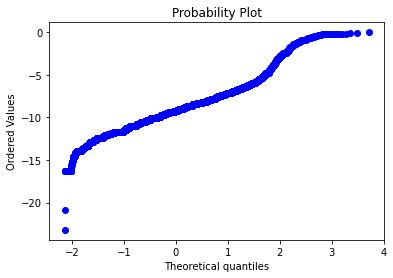

In [413]:
from scipy import stats
proby = scaled
stats.probplot(proby, plot = plt)
plt.show()

In [36]:
import seaborn as sns

Xtr2 = pd.read_csv('data/Xtr6.csv')
Xte2 = pd.read_csv('data/Xte6.csv')

<AxesSubplot:>

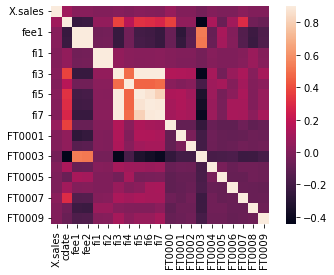

In [435]:
corrmat = Xtr2.corr()
#plt.subplots(figsize(12,9))
sns.heatmap(corrmat, vmax = 0.9, square = True)

In [96]:
a = np.zeros(shape = 5,dtype = int)
a[1]

0

In [97]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(Xtr2,tr['total'], test_size = 0.1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Validation function
n_folds = 5

X = scaler.fit_transform(Xtr2)
y = tr['total']

def mae_out(model):
    kfold = KFold(n_splits = 5,shuffle = True, random_state = 1)
    a = np.zeros(shape = 5,dtype = int)
    i = 0
    for train_index, test_index in kfold.split(Xtr2):
        X_train,X_test = X[train_index],X[test_index]
        y_train,y_test = y[train_index],y[test_index]
        model.fit(X_train,y_train)
        mae= mean_absolute_error(y_test,model.predict(X_test))
        a[i] = mae
        i = i+1
    return(np.mean(a))



lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

print('lasso: ',mae_out(lasso))
print('ENet: ',mae_out(ENet))
print('KRR: ',mae_out(KRR))
print('GBoost: ',mae_out(GBoost))
print('XGB: ',mae_out(model_xgb))
print('LGB: ',mae_out(model_lgb))


C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.638e+06, tolerance: 2.619e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.914e+06, tolerance: 3.143e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

lasso:  18.4


C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.590e+06, tolerance: 3.143e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.294e+06, tolerance: 3.139e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

ENet:  18.4
KRR:  19.8
GBoost:  8.4
[13:38:11] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:38:13] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:38:15] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameter

In [441]:
def mae_tr(model):
    model.fit(Xtr2,tr['total'])
    mae= mean_absolute_error(tr['total'],model.predict(Xtr2))
    return(mae)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='absolute_error', random_state =5)

print('GBoost: ',mae_out(GBoost))

bestmae = mae_out(GBoost)
for lr in range()


GBoost:  12.34641072248929


In [457]:
lrlist = np.array([0.05,0.25,0.5,0.75,1,1.25,1.5,1.75,2])
bestlr = 0.05
for lr in np.nditer(lrlist):
    GBoost = GradientBoostingRegressor(n_estimators=500, learning_rate=lr,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=35, 
                                   loss='absolute_error', random_state =5)
    if lr==0.05:
        bestmae = mae_out(GBoost)
    elif bestmae>mae_out(GBoost):
        bestlr = lr
        bestmae = mae_out(GBoost)

print('lr: ',bestlr, ' mae: ',bestmae)


lr:  1.25  mae:  11.32481931403809


In [458]:
nest = np.array([50,100,150,200,250,300,350,400,500,750,1000,1500,2000,3000,4000])
bestnest = 50
for n in np.nditer(nest):
    GBoost = GradientBoostingRegressor(n_estimators=n, learning_rate=bestlr,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=35, 
                                   loss='absolute_error', random_state =5)
    if n == 50:
        bestmae = mae_out(GBoost)
    elif bestmae>mae_out(GBoost):
        bestnest = n
        bestmae = mae_out(GBoost)

print('nest: ',bestnest, ' mae: ',bestmae)

nest:  500  mae:  11.32481931403809


In [472]:
gs = pd.DataFrame(gsearch1.cv_results_)
gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.985500,0.013338,0.001600,2.000585e-04,100,{'n_estimators': 100},0.009657,0.053700,0.017099,0.037795,0.013679,0.026386,0.016756,8
1,1.936700,0.011911,0.002199,2.458467e-04,200,{'n_estimators': 200},0.009684,0.053838,0.018395,0.037894,0.013703,0.026703,0.016669,7
2,2.878299,0.019050,0.003099,2.002487e-04,300,{'n_estimators': 300},0.009650,0.055079,0.019419,0.038031,0.014372,0.027310,0.016897,5
3,3.842100,0.017554,0.003899,2.008440e-04,400,{'n_estimators': 400},0.016045,0.055660,0.017351,0.038797,0.013757,0.028322,0.016373,1
4,4.792800,0.025097,0.004399,1.994615e-04,500,{'n_estimators': 500},0.009622,0.054481,0.018327,0.038396,0.013746,0.026914,0.016958,6
5,5.732300,0.049063,0.004999,3.162812e-04,600,{'n_estimators': 600},0.012483,0.048694,0.018392,0.038067,0.013708,0.026269,0.014505,9
6,6.622600,0.039864,0.005800,2.445617e-04,700,{'n_estimators': 700},0.009706,0.055382,0.018189,0.040099,0.013801,0.027436,0.017476,4
7,7.608401,0.049532,0.006499,3.693565e-07,800,{'n_estimators': 800},0.009646,0.051740,0.017458,0.044627,0.017740,0.028242,0.016691,2
8,8.564000,0.052674,0.006999,7.072638e-07,900,{'n_estimators': 900},0.009648,0.051585,0.017061,0.047150,0.013702,0.027829,0.017797,3


In [473]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(200,600,100), 'learning_rate':[0.05,0.25,0.5,0.75,1,1.25,1.5,1.75,2]}
gb = GradientBoostingRegressor(loss='absolute_error')
gsearch1 = GridSearchCV(gb,param_test1)
gsearch1.fit(X_train,y_train)


GridSearchCV(estimator=GradientBoostingRegressor(loss='absolute_error'),
             param_grid={'learning_rate': [0.05, 0.25, 0.5, 0.75, 1, 1.25, 1.5,
                                           1.75, 2],
                         'n_estimators': range(200, 600, 100)})

In [474]:
gs = pd.DataFrame(gsearch1.cv_results_)
gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.981333,0.016197,0.003099,4.891326e-04,0.05,200,"{'learning_rate': 0.05, 'n_estimators': 200}",0.015080,0.033569,0.005642,0.027288,0.009004,0.018117,0.010684,29
1,2.962600,0.023355,0.003599,2.004168e-04,0.05,300,"{'learning_rate': 0.05, 'n_estimators': 300}",0.015068,0.045789,0.014183,0.027540,0.009011,0.022318,0.013221,27
2,3.886200,0.041774,0.004299,2.452042e-04,0.05,400,"{'learning_rate': 0.05, 'n_estimators': 400}",0.015832,0.044676,0.005745,0.022780,0.008997,0.019606,0.013838,28
3,4.809100,0.040545,0.004899,2.004866e-04,0.05,500,"{'learning_rate': 0.05, 'n_estimators': 500}",0.015127,0.033674,0.004676,0.023131,0.009076,0.017137,0.010331,30
4,1.918900,0.017687,0.001999,6.810597e-07,0.25,200,"{'learning_rate': 0.25, 'n_estimators': 200}",0.028463,0.079059,0.019100,0.061845,-0.001662,0.037361,0.029236,18
5,2.851999,0.014152,0.002802,2.470656e-04,0.25,300,"{'learning_rate': 0.25, 'n_estimators': 300}",0.014563,0.073918,0.042899,0.063517,0.020817,0.043143,0.023141,15
6,3.780401,0.020568,0.003400,2.002957e-04,0.25,400,"{'learning_rate': 0.25, 'n_estimators': 400}",0.012590,0.070267,0.050124,0.040249,-0.000858,0.034474,0.025639,21
7,4.745800,0.018924,0.004000,2.431402e-07,0.25,500,"{'learning_rate': 0.25, 'n_estimators': 500}",0.028465,0.066210,0.016678,0.040381,0.013841,0.033115,0.019034,23
8,1.909900,0.016249,0.001899,1.998669e-04,0.5,200,"{'learning_rate': 0.5, 'n_estimators': 200}",0.058312,0.104767,0.017970,0.050560,0.031463,0.052614,0.029679,14
9,2.852000,0.029426,0.002600,1.999162e-04,0.5,300,"{'learning_rate': 0.5, 'n_estimators': 300}",0.059628,0.073921,0.017938,0.114321,0.030990,0.059360,0.033922,12


In [39]:
from sklearn.model_selection import GridSearchCV
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gb2 = GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.75,loss='absolute_error')
# GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.75,max_depth = 13, min_samples_split = 200,loss='absolute_error')
gsearch2 = GridSearchCV(gb2,param_test2)
gsearch2.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.75,
                                                 loss='absolute_error',
                                                 n_estimators=400),
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 1001, 200)})

In [40]:
gs2 = pd.DataFrame(gsearch2.cv_results_)
gs2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.976300,0.020635,0.004900,1.997233e-04,5,200,"{'max_depth': 5, 'min_samples_split': 200}",-0.027027,0.114974,0.121019,0.069402,0.068009,0.069275,0.052994,27
1,5.927600,0.016406,0.005100,1.996527e-04,5,400,"{'max_depth': 5, 'min_samples_split': 400}",0.150060,0.108152,0.109629,0.112724,0.107708,0.117655,0.016298,6
2,5.913700,0.018304,0.005000,4.672031e-07,5,600,"{'max_depth': 5, 'min_samples_split': 600}",0.036617,0.151591,0.065702,0.089838,0.042129,0.077175,0.041720,22
3,5.895799,0.037434,0.004900,1.999390e-04,5,800,"{'max_depth': 5, 'min_samples_split': 800}",0.073109,0.158742,0.126176,0.092763,0.062090,0.102576,0.035539,14
4,5.861500,0.024740,0.005000,1.168008e-07,5,1000,"{'max_depth': 5, 'min_samples_split': 1000}",-0.015085,0.152847,0.129067,0.063736,0.110985,0.088310,0.059388,19
5,8.184200,0.027663,0.007401,2.003768e-04,7,200,"{'max_depth': 7, 'min_samples_split': 200}",0.001647,0.040350,0.106191,-0.014873,0.041674,0.034998,0.041812,30
6,8.090900,0.036839,0.007500,5.917394e-07,7,400,"{'max_depth': 7, 'min_samples_split': 400}",0.020567,0.065764,0.072388,0.129819,0.086573,0.075022,0.035197,25
7,8.124500,0.086021,0.007401,1.998206e-04,7,600,"{'max_depth': 7, 'min_samples_split': 600}",0.214389,0.089894,-0.007833,0.161594,0.139755,0.119560,0.075201,4
8,8.046100,0.010777,0.007500,4.101908e-07,7,800,"{'max_depth': 7, 'min_samples_split': 800}",0.037810,0.175360,0.067908,-0.043263,0.141355,0.075834,0.077319,24
9,7.972900,0.037118,0.007100,1.999620e-04,7,1000,"{'max_depth': 7, 'min_samples_split': 1000}",0.055833,0.141944,0.035934,0.071006,0.055628,0.072069,0.036669,26


In [41]:
param_test3 = {'min_samples_leaf':range(30,71,10), 'min_samples_split':range(50,300,50)}
gb3 = GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.75,max_depth = 13,loss='absolute_error')
gsearch3 = GridSearchCV(gb3,param_test3)
gsearch3.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.75,
                                                 loss='absolute_error',
                                                 max_depth=13,
                                                 n_estimators=400),
             param_grid={'min_samples_leaf': range(30, 71, 10),
                         'min_samples_split': range(50, 300, 50)})

In [42]:
gs3 = pd.DataFrame(gsearch3.cv_results_)
gs3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,14.749017,0.048232,0.019900,2.001288e-04,30,50,"{'min_samples_leaf': 30, 'min_samples_split': 50}",0.144237,0.231891,0.116903,0.114104,0.242381,0.169903,0.055994,1
1,13.637500,0.028522,0.018701,2.446982e-04,30,100,"{'min_samples_leaf': 30, 'min_samples_split': ...",0.175557,0.165445,0.099012,0.159973,0.147863,0.149570,0.026813,4
2,13.032101,0.055630,0.018099,1.989128e-04,30,150,"{'min_samples_leaf': 30, 'min_samples_split': ...",0.192948,0.176930,0.056902,0.033756,0.099869,0.112081,0.063362,8
3,12.637394,0.037679,0.017506,3.263176e-04,30,200,"{'min_samples_leaf': 30, 'min_samples_split': ...",0.170356,0.177364,0.127077,0.102368,0.192429,0.153919,0.033707,3
4,12.424400,0.035628,0.017200,2.450680e-04,30,250,"{'min_samples_leaf': 30, 'min_samples_split': ...",0.183195,0.180062,0.131931,0.115414,0.160992,0.154319,0.026668,2
5,13.791394,0.034594,0.019606,2.118828e-04,40,50,"{'min_samples_leaf': 40, 'min_samples_split': 50}",0.073923,0.240715,0.069933,0.116140,0.046236,0.109389,0.069419,10
6,13.311000,0.046635,0.019400,1.998664e-04,40,100,"{'min_samples_leaf': 40, 'min_samples_split': ...",0.095636,0.192234,0.125183,0.067103,0.094114,0.114854,0.042835,6
7,12.592900,0.041043,0.018500,3.015783e-07,40,150,"{'min_samples_leaf': 40, 'min_samples_split': ...",0.157583,0.208531,0.064004,0.022155,0.134266,0.117308,0.066523,5
8,12.234105,0.061120,0.017795,4.047910e-04,40,200,"{'min_samples_leaf': 40, 'min_samples_split': ...",0.083352,0.138460,0.068598,0.097431,0.070738,0.091716,0.025543,19
9,11.891201,0.051611,0.017300,2.448729e-04,40,250,"{'min_samples_leaf': 40, 'min_samples_split': ...",0.076917,0.177669,0.061720,0.157434,0.088994,0.112547,0.046181,7


In [46]:
param_test4 = {'max_features':range(5,22,2), 'min_samples_split':range(20,61,10)}
gb4 = GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.75,max_depth = 13,min_samples_leaf = 30,loss='absolute_error')
gsearch4 = GridSearchCV(gb4,param_test4)
gsearch4.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.75,
                                                 loss='absolute_error',
                                                 max_depth=13,
                                                 min_samples_leaf=30,
                                                 n_estimators=400),
             param_grid={'max_features': range(5, 22, 2),
                         'min_samples_split': range(20, 61, 10)})

In [47]:
gs4 = pd.DataFrame(gsearch4.cv_results_)
gs4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.840935,0.045032,0.021500,1.482036e-06,5,20,"{'max_features': 5, 'min_samples_split': 20}",0.279298,0.137664,0.231177,0.071693,0.155947,0.175156,0.072750,15
1,6.795099,0.061112,0.021400,2.001538e-04,5,30,"{'max_features': 5, 'min_samples_split': 30}",0.171970,0.180735,0.142996,0.108361,0.206041,0.162021,0.033551,26
2,6.866700,0.086372,0.021300,2.449900e-04,5,40,"{'max_features': 5, 'min_samples_split': 40}",0.108827,0.195997,0.145112,0.084844,0.106528,0.128262,0.039005,43
3,6.841000,0.082566,0.021300,2.447173e-04,5,50,"{'max_features': 5, 'min_samples_split': 50}",0.158150,0.233831,0.168044,0.049186,0.151127,0.152067,0.059267,34
4,6.842800,0.040739,0.021400,3.746359e-04,5,60,"{'max_features': 5, 'min_samples_split': 60}",0.265140,0.197384,0.081775,0.112971,0.232618,0.177978,0.069915,14
5,7.769200,0.070845,0.020900,2.002244e-04,7,20,"{'max_features': 7, 'min_samples_split': 20}",0.136932,0.165608,0.079034,0.145197,0.189129,0.143180,0.036803,37
6,7.792600,0.029737,0.020900,1.998191e-04,7,30,"{'max_features': 7, 'min_samples_split': 30}",0.270094,0.242974,0.171519,0.186615,0.214635,0.217167,0.036030,1
7,7.764700,0.073404,0.020900,1.999866e-04,7,40,"{'max_features': 7, 'min_samples_split': 40}",0.232672,0.102094,0.223320,0.123754,0.168009,0.169970,0.052009,20
8,7.745800,0.052959,0.020901,3.737692e-04,7,50,"{'max_features': 7, 'min_samples_split': 50}",0.260801,0.175275,0.101682,0.064109,0.174569,0.155287,0.067958,33
9,7.724601,0.033882,0.020700,2.452827e-04,7,60,"{'max_features': 7, 'min_samples_split': 60}",0.242187,0.229385,0.127572,0.155512,0.209318,0.192795,0.044035,3


In [48]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gb5 = GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.75,max_depth = 13,min_samples_leaf = 30,max_features = 7, min_samples_split = 30,loss='absolute_error')
gsearch5 = GridSearchCV(gb5,param_test5)
gsearch5.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.75,
                                                 loss='absolute_error',
                                                 max_depth=13, max_features=7,
                                                 min_samples_leaf=30,
                                                 min_samples_split=30,
                                                 n_estimators=400),
             param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]})

In [49]:
gs5 = pd.DataFrame(gsearch5.cv_results_)
gs5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.917201,0.061240,0.022199,2.438616e-04,0.6,{'subsample': 0.6},0.063028,0.104487,0.173064,0.102636,0.088138,0.106271,0.036542,6
1,6.570300,0.041746,0.022500,6.143617e-07,0.7,{'subsample': 0.7},0.117906,0.097235,0.104968,0.148800,0.071381,0.108058,0.025412,5
2,6.851300,0.048843,0.022700,5.098003e-04,0.75,{'subsample': 0.75},0.189353,0.239105,0.125509,0.105625,0.184367,0.168792,0.047902,1
3,7.147000,0.051851,0.022400,2.009872e-04,0.8,{'subsample': 0.8},0.154764,0.139866,0.062889,0.098254,0.199970,0.131148,0.047141,3
4,7.399799,0.024355,0.022500,3.159788e-04,0.85,{'subsample': 0.85},0.223698,0.173551,0.254244,0.018854,0.095426,0.153155,0.086001,2
5,7.546600,0.021425,0.021900,1.999147e-04,0.9,{'subsample': 0.9},0.138746,0.160988,0.166305,0.012624,0.094953,0.114723,0.056909,4


In [53]:
model = GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.75,max_depth = 13,
                          min_samples_leaf = 30,max_features = 7, min_samples_split = 30,
                          loss='absolute_error',subsample = 0.75).fit(Xtr2,tr['total'])
model.predict(Xte2)

array([ 2.01476581, 81.90744259,  0.11577598, ...,  1.45063095,
        0.45144119,  0.65536851])

In [55]:
pred5 = pd.read_csv('data/pred.csv')
pred5['total'] = model.predict(Xte2)
pred5.to_csv('data/pred_gb.csv', index = False)
pred5

,id,total
0,7e79f1a9cb10504dd2fc569d84f2a346,2.014766
1,4a2f52a31466509462042dacd3d66de7,81.907443
2,f22f6ec19360a7bcc7e0f6c76912c88b,0.115776
3,6382e9933644b1751511264ec8194ef5,-0.665334
4,638c2f2961777b10009d7fdebae561bc,-0.173393
...,...,...
6909,62eb6ce056e943070967d8835a204551,1.128803
6910,6a5a9ef25ea4889cef2b14a272ba958c,0.000754
6911,6c8edfdb7aec834d73e4b8d36ec0736d,1.450631
6912,c4618bb91765903dad4451933ee396ea,0.451441


In [56]:
tsvdtr = pd.read_csv('data/tsvd-tr.csv')
tsvdte = pd.read_csv('data/tsvd-te.csv')

model = GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.75,max_depth = 13,
                          min_samples_leaf = 30,max_features = 7, min_samples_split = 30,
                          loss='absolute_error',subsample = 0.75).fit(tsvdtr,tr['total'])
pred5 = pd.read_csv('data/pred.csv')
pred5['total'] = model.predict(tsvdte)
pred5.to_csv('data/pred_gb_svd.csv', index = False)
pred5

ValueError: could not convert string to float: 'a44a5f4c5e13910205404271e750e7bc'

In [76]:
Xtr3 =Xtr2.copy()
Xte3 = Xte2.copy()

In [78]:
Xtr3['FT0000'] = tsvdtr['FT0000']
Xtr3['FT0001'] = tsvdtr['FT0001']
Xtr3['FT0002'] = tsvdtr['FT0002']
Xtr3['FT0003'] = tsvdtr['FT0003']
Xtr3['FT0004'] = tsvdtr['FT0004']
Xtr3['FT0005'] = tsvdtr['FT0005']
Xtr3['FT0006'] = tsvdtr['FT0006']
Xtr3['FT0007'] = tsvdtr['FT0007']
Xtr3['FT0008'] = tsvdtr['FT0008']
Xtr3['FT0009'] = tsvdtr['FT0009']

In [79]:
Xte3['FT0000'] = tsvdte['FT0000']
Xte3['FT0001'] = tsvdte['FT0001']
Xte3['FT0002'] = tsvdte['FT0002']
Xte3['FT0003'] = tsvdte['FT0003']
Xte3['FT0004'] = tsvdte['FT0004']
Xte3['FT0005'] = tsvdte['FT0005']
Xte3['FT0006'] = tsvdte['FT0006']
Xte3['FT0007'] = tsvdte['FT0007']
Xte3['FT0008'] = tsvdte['FT0008']
Xte3['FT0009'] = tsvdte['FT0009']

In [82]:
Xte3.to_csv('data/Xte_tsvd.csv', index = False)
Xtr3.to_csv('data/Xtr_tsvd.csv', index = False)

In [86]:
model = GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.75,max_depth = 13,
                          min_samples_leaf = 30,max_features = 7, min_samples_split = 30,
                          loss='absolute_error',subsample = 0.75).fit(Xtr3,tr['total'])
pred5 = pd.read_csv('data/pred.csv')
pred5['total'] = model.predict(Xte3)
pred5.to_csv('data/pred_gb_svd.csv', index = False)
pred5

,id,total
0,7e79f1a9cb10504dd2fc569d84f2a346,0.201492
1,4a2f52a31466509462042dacd3d66de7,-4.213729
2,f22f6ec19360a7bcc7e0f6c76912c88b,0.115521
3,6382e9933644b1751511264ec8194ef5,-0.088799
4,638c2f2961777b10009d7fdebae561bc,1.156317
...,...,...
6909,62eb6ce056e943070967d8835a204551,0.861648
6910,6a5a9ef25ea4889cef2b14a272ba958c,-0.315091
6911,6c8edfdb7aec834d73e4b8d36ec0736d,0.183275
6912,c4618bb91765903dad4451933ee396ea,0.517505


In [87]:
ldatr = pd.read_csv('data/Xtr_lda.csv')
ldate = pd.read_csv('data/Xte_lda.csv')

model = GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.75,max_depth = 13,
                          min_samples_leaf = 30,max_features = 7, min_samples_split = 30,
                          loss='absolute_error',subsample = 0.75).fit(ldatr,tr['total'])
pred5 = pd.read_csv('data/pred.csv')
pred5['total'] = model.predict(ldate)
pred5.to_csv('data/pred_gb_lda.csv', index = False)
pred5

,id,total
0,7e79f1a9cb10504dd2fc569d84f2a346,0.198558
1,4a2f52a31466509462042dacd3d66de7,6.008456
2,f22f6ec19360a7bcc7e0f6c76912c88b,0.269988
3,6382e9933644b1751511264ec8194ef5,0.477923
4,638c2f2961777b10009d7fdebae561bc,1.445434
...,...,...
6909,62eb6ce056e943070967d8835a204551,1.165767
6910,6a5a9ef25ea4889cef2b14a272ba958c,0.122157
6911,6c8edfdb7aec834d73e4b8d36ec0736d,1.049804
6912,c4618bb91765903dad4451933ee396ea,0.708014


In [ ]:
from sklearn.grid_search import GridSearchCV 

In [430]:
from sklearn.linear_model import SGDRegressor

model5 = SGDRegressor(loss = 'epsilon_insensitive', alpha = 0, epsilon = 0).fit(Xtr6, tr['total'])
pred5 = pred.copy()
pred5['total'] = model5.predict(Xte6)
pred5.to_csv('data/pred_sgd.csv', index = False)
pred5['total']

0       0.057060
1       0.044032
2       0.060109
3       0.078806
4       0.149271
          ...   
6909    0.184663
6910    0.100795
6911    0.211626
6912    0.115224
6913    0.163427
Name: total, Length: 6914, dtype: float64

In [362]:
ldatr
ldatr1 = ldatr[['X.sales','cdate','fee1','fee2']].copy()
ldate1 = ldate[['X.sales','cdate','fee1','fee2']].copy()

In [363]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(ldatr1,tr['total'])

pred8 = pred.copy()
pred8['total'] = xgb_reg.predict(ldate1)
#pred8.to_csv('data/pred_xgblda.csv', index = False)
np.median(pred8['total'])

0        0.247992
1       60.662479
2        0.950926
3        0.856886
4        0.969652
          ...    
6909     1.661083
6910     0.643355
6911     1.637939
6912    -0.165792
6913    -1.927840
Name: total, Length: 6914, dtype: float32

In [365]:
np.median(pred8['total'])

0.64335465

In [364]:
np.median(tr['total'])

0.12

In [74]:
# two things

# bug 

# classification didnt work very well

# look at tensorflow tutorial keras regression
